In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import healpy as hp

# 1M

In [71]:
NSIDE = 512
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 512 is 0.11 deg


In [72]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

3145728


In [73]:
original_mat_path = 'frequency_1M/B_1Mhz.txt'
original_image = np.loadtxt(original_mat_path)

# 50周期

In [74]:
reconstructed_mat_path = 'period50_1M/sum_50_fromB_divdldmdn.txt'
reconstructed_50 = np.loadtxt(reconstructed_mat_path)

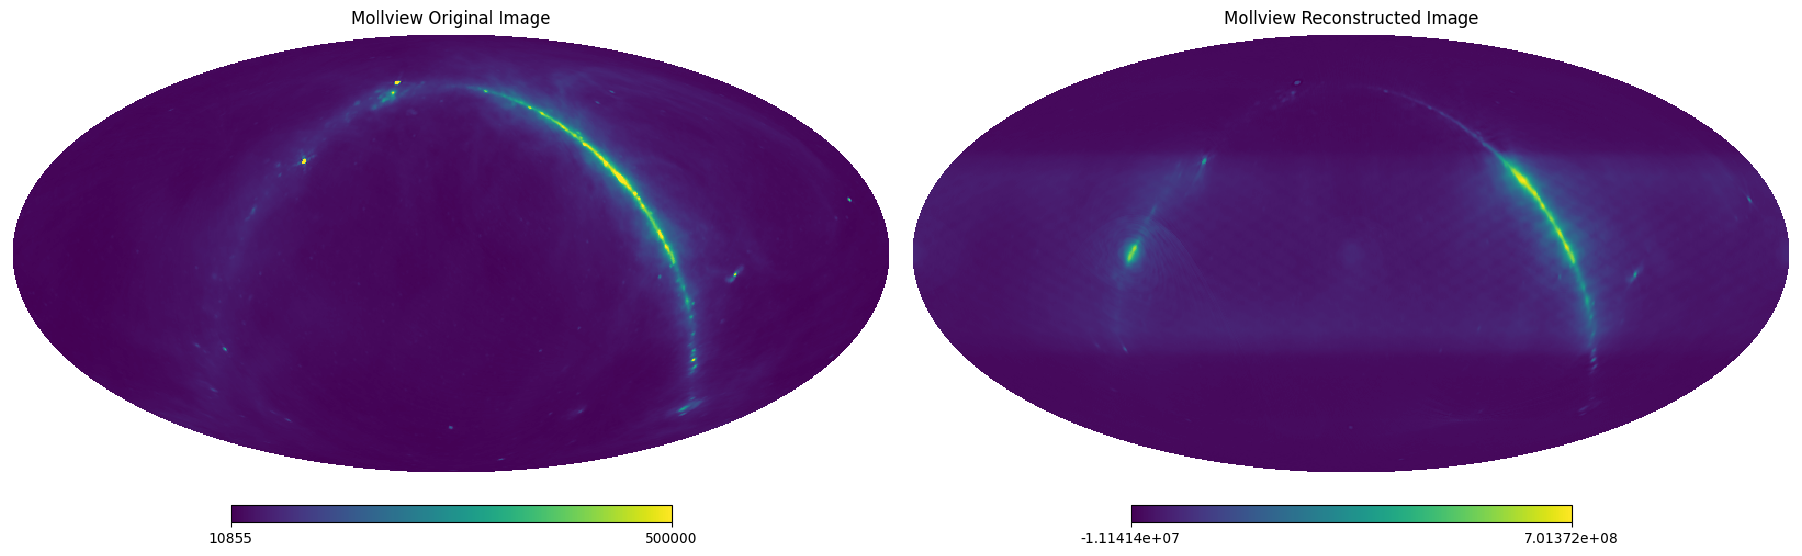

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    original_image,
    nest=True,
    title="Mollview Original Image",
    sub=(1, 2, 1),
    cmap='viridis',
)
axs[0].axis('off')

hp.mollview(
    reconstructed_50,
    nest=True,
    title="Mollview Reconstructed Image",
    sub=(1, 2, 2),
    cmap='viridis',
)
axs[1].axis('off')

plt.show()

In [76]:
# 数据归一化到0-1范围
original_normalized = (original_image - np.min(original_image)) / (np.max(original_image) - np.min(original_image))
reconstructed_normalized = (reconstructed_50 - np.min(reconstructed_50)) / (np.max(reconstructed_50) - np.min(reconstructed_50))

In [77]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

def PSNR(original, reconstructed, max_pixel=255.0):
    # 计算均方误差 (MSE)
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')  # 如果图像完全相同，PSNR 为无穷大
    # 计算 PSNR
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    print(f"PSNR: {psnr_value}")

# 计算SSIM
def SSIM(original_image, reconstructed_image):
    ssim_value, _ = ssim(original_image, reconstructed_image, full=True, data_range=reconstructed_image.max() - reconstructed_image.min())
    print(f"SSIM: {ssim_value}")

# 计算MSE
def MSE(original_image, reconstructed_image):
    mse_value = mse(original_image, reconstructed_image)
    print(f"MSE: {mse_value}")

In [78]:
ori = original_normalized * (np.max(original_image) - np.min(original_image)) + np.min(original_image),

rec = reconstructed_normalized * (np.max(original_image) - np.min(original_image)) + np.min(original_image),

In [79]:
PSNR(original_normalized, reconstructed_normalized)
SSIM(original_normalized, reconstructed_normalized)
MSE(original_normalized, reconstructed_normalized)

PSNR: 72.83194040403173
SSIM: 0.7437221164146681
MSE: 0.0033875547298329914


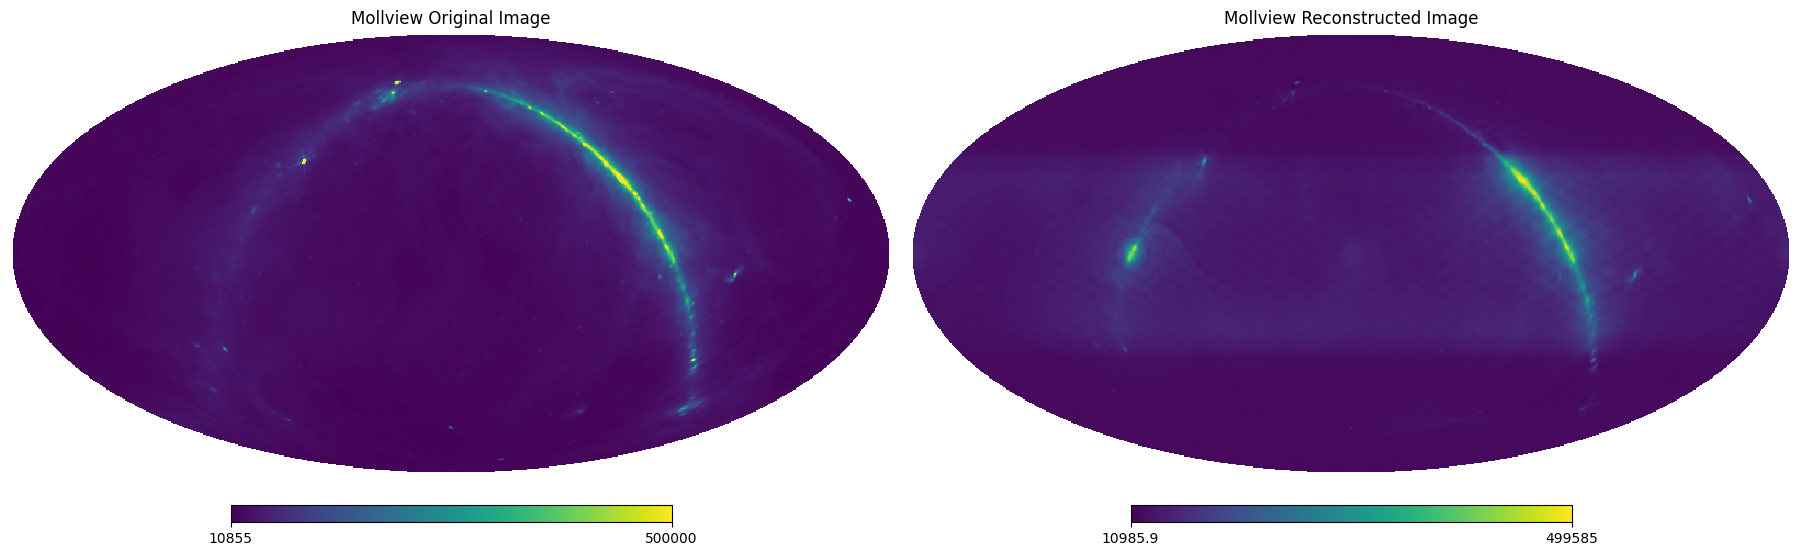

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    ori[0],
    nest=True,
    title="Mollview Original Image",
    sub=(1, 2, 1),
    cmap='viridis',
)
axs[0].axis('off')

hp.mollview(
    rec[0],
    nest=True,
    title="Mollview Reconstructed Image",
    sub=(1, 2, 2),
    cmap='viridis',
)
axs[1].axis('off')

plt.show()

# 消除亮点后

In [81]:
reconstructed_mat_path = 'period50_1M/sum_50_fromB_divdldmdn_half.txt'
reconstructed_half = np.loadtxt(reconstructed_mat_path)

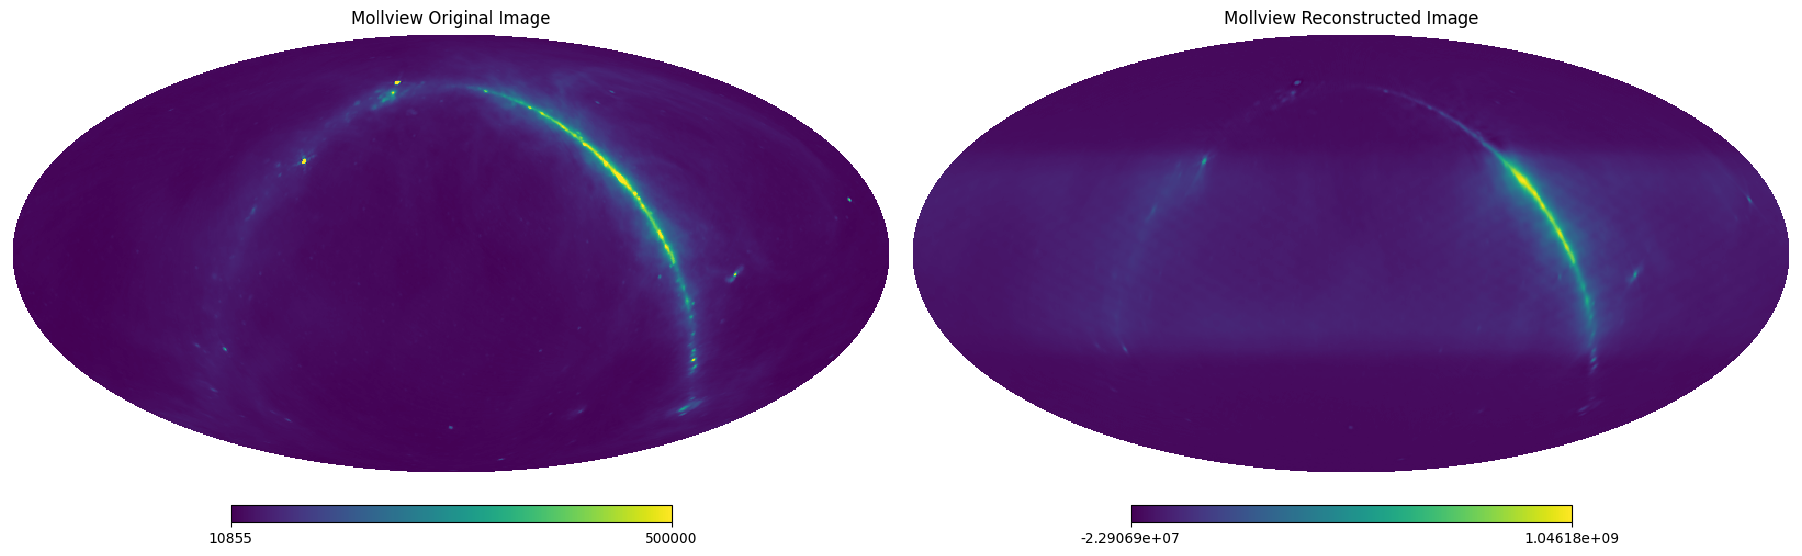

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    original_image,
    nest=True,
    title="Mollview Original Image",
    sub=(1, 2, 1),
    cmap='viridis',
)
axs[0].axis('off')

hp.mollview(
    reconstructed_half,
    nest=True,
    title="Mollview Reconstructed Image",
    sub=(1, 2, 2),
    cmap='viridis',
)
axs[1].axis('off')

plt.show()

In [83]:
# 数据归一化到0-1范围
reconstructed_half_norm = (reconstructed_half - np.min(reconstructed_half)) / (np.max(reconstructed_half) - np.min(reconstructed_half))

In [84]:
rec_half = reconstructed_half_norm * (np.max(original_image) - np.min(original_image)) + np.min(original_image),

In [85]:
PSNR(original_normalized, reconstructed_half_norm)
SSIM(original_normalized, reconstructed_half_norm)
MSE(original_normalized, reconstructed_half_norm)

PSNR: 72.88769453495104
SSIM: 0.7287640577836029
MSE: 0.0033443437279904458


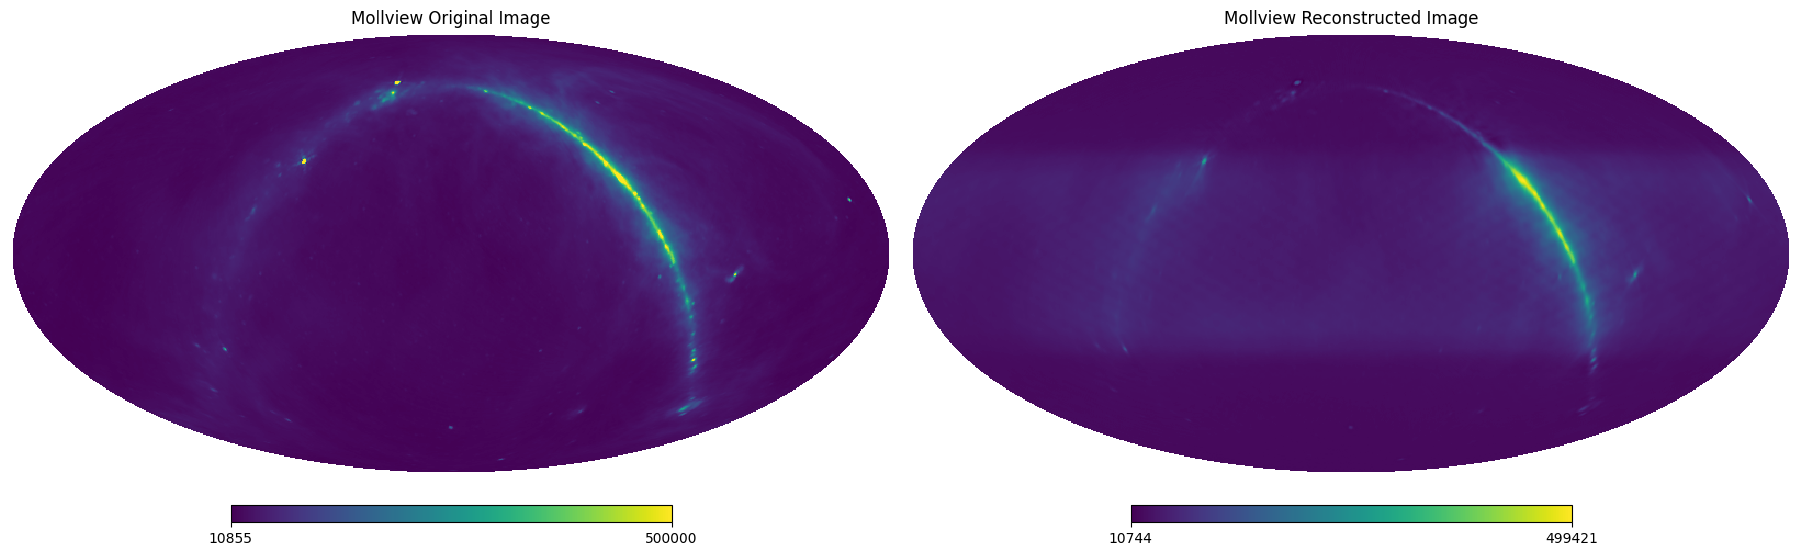

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    ori[0],
    nest=True,
    title="Mollview Original Image",
    sub=(1, 2, 1),
    cmap='viridis',
)
axs[0].axis('off')

hp.mollview(
    rec_half[0],
    nest=True,
    title="Mollview Reconstructed Image",
    sub=(1, 2, 2),
    cmap='viridis',
)
axs[1].axis('off')

plt.show()

(0.0, 1.0, 0.0, 1.0)

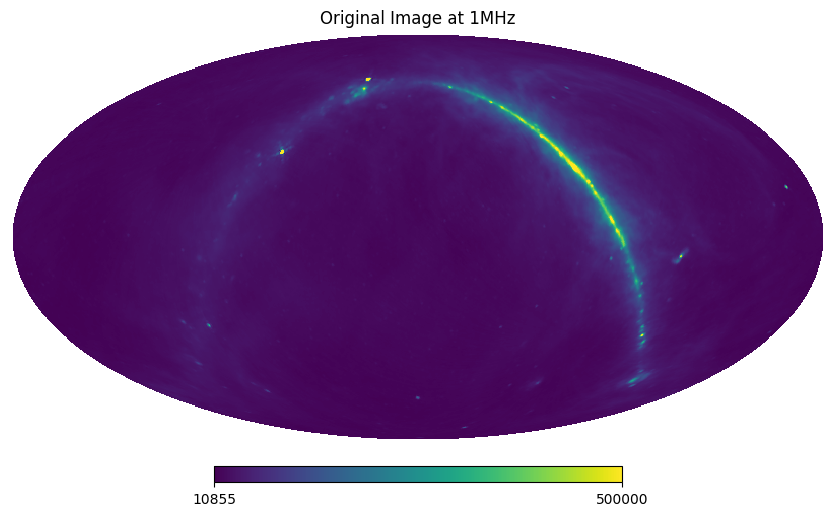

In [90]:
hp.mollview(
    ori[0],
    nest=True,
    title="Original Image at 1MHz",
    cmap='viridis',
)
axs[0].axis('off')

(0.0, 1.0, 0.0, 1.0)

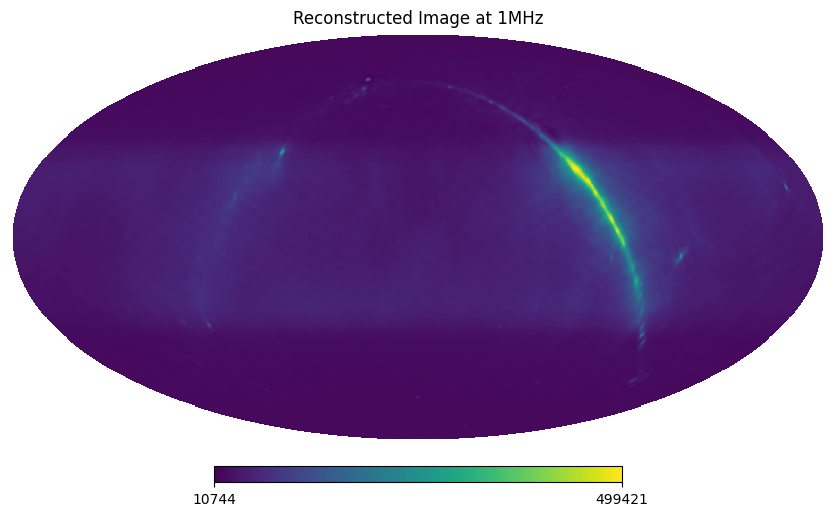

In [88]:
hp.mollview(
    rec_half[0],
    nest=True,
    title="Reconstructed Image at 1MHz",
    cmap='viridis',
)
axs[0].axis('off')